# Hometask 3

### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещённую и несмещённую оценки дисперсий для этой выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

Решение:

In [1]:
import numpy as np
import pandas as pd

In [30]:
data = pd.Series([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
data.shape

(20,)

In [31]:
data.describe()

count     20.000000
mean      65.300000
std       31.624607
min       17.000000
25%       42.000000
50%       67.500000
75%       81.000000
max      150.000000
dtype: float64

Среднее арифметическое

In [32]:
mean1 = data.sum() / data.count()
mean1

65.3

In [33]:
mean2 = data.mean()
mean2

65.3

Среднеквадратичное отклонение

In [38]:
std1 = np.sqrt(((data - mean1) ** 2).sum() / data.count())
std1

30.823854398825596

In [39]:
std2 = data.std(ddof=0)
std2

30.823854398825596

Дисперсии

In [40]:
variance11 = ((data - mean1) ** 2).sum() / data.count()
variance11

950.11

In [41]:
variance12 = ((data - mean1) ** 2).sum() / (data.count() - 1)
variance12

1000.1157894736842

In [42]:
variance21 = data.var(ddof=0)
variance21

950.11

In [43]:
variance22 = data.var(ddof=1)
variance22

1000.1157894736842

### Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выбросы в выборке, используя для этого «усы» из boxplot. В этой задаче можно использовать статистические функции.

Решение:

In [44]:
q1 = data.quantile(0.25)
q1

42.0

In [46]:
q3 = data.quantile(0.75)
q3

81.0

In [48]:
q = q3 - q1
q

39.0

Выбросы

In [50]:
data.describe()

count     20.000000
mean      65.300000
std       31.624607
min       17.000000
25%       42.000000
50%       67.500000
75%       81.000000
max      150.000000
dtype: float64

Судя по среднему значению и стандарному отклонению есть как минимум один выброс и это максимальное значение.

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

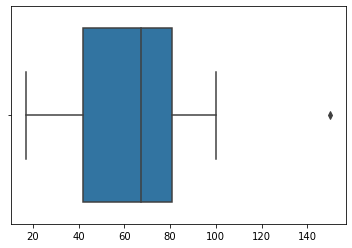

In [58]:
sns.boxplot(data)
plt.show()

По "усам" похоже, что есть один выброс.

### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C — 0.9. Студент сдал первую сессию. Определить вероятность, что он учится:

На факультете A.

На факультете B.

На факультете C.

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Решение:

Студентов на факультете А и В по $\frac{1}{4}$, а на факультете С $\frac{1}{2}$

Тогда полная вероятность равна:

In [59]:
pa = 1/4 * 0.8 + 1/4 * 0.7 + 1/2 * 0.9
pa

0.825

Используется формула Байеса

$$P(B\:|\:A) = \frac{P(B) \cdot P(A\:|\:B)}{P(A)}$$

In [60]:
# вероятность что учится на факультете А
pbaa = 1/4 * 0.8 / pa
pbaa

0.24242424242424246

In [62]:
# вероятность что учится на факультете B
pbaa = 1/4 * 0.7 / pa
pbaa

0.21212121212121213

In [63]:
# вероятность что учится на факультете C
pbaa = 1/2 * 0.9 / pa
pbaa

0.5454545454545455